In [4]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [48]:
def mean(values, axis=None):
    """Function to use in bootstrap
    Inputs : 
    values : data to average
    axis : axis or axes along which average
    Outputs :
    mean
    """
    if axis==None:
        return np.mean(values)
    else:
        return np.mean(values, axis=axis)
def resampling(values,B):
    """Creates B samples for the bootstrap (with replacements)
    Inputs : 
    values : data to use 
    B : number of samples needed
    Ouput : 
    x_resampled : array with dim0=B+1, contains the B samples and the original data in the last column 
    (x_resampled[0,:,:])
    """
    if B==1:
        return sklearn.utils.resample(values,replace=True)
    else:
        x_resampled = values
        x_resampled = np.expand_dims(x_resampled,axis=0)
        for i in range(B):
            x_resampled = np.insert(x_resampled,-1,sklearn.utils.resample(values,replace=True),axis=0)
        return x_resampled

In [49]:
data = np.random.exponential(0.1,100)
x_resampled = resampling(data,1000)

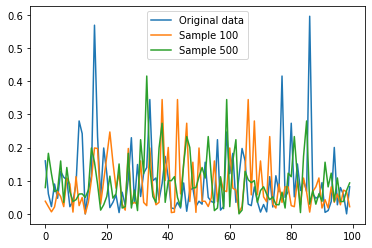

In [50]:
plt.plot(data,label='Original data')
plt.plot(x_resampled[100],label='Sample 100')
plt.plot(x_resampled[500],label='Sample 500')
plt.legend()

In [51]:
means = [mean(i) for i in x_resampled]

In [52]:
alpha = 0.9
p = ((1.0-alpha)/2.0) * 100
lower = np.percentile(means, p)
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = np.percentile(means, p)

Text(0.5, 1.0, 'Distibution mean')

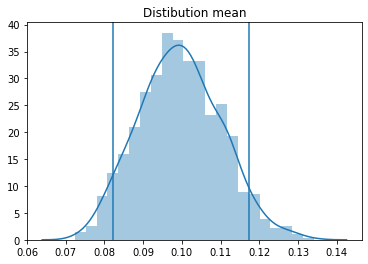

In [53]:
fig,ax = plt.subplots()
sns.distplot(means)
ax.axvline(lower)
ax.axvline(upper)
ax.set_title('Distibution mean')

In [54]:
data = np.random.exponential(1,(10,10))

In [55]:
B = 3
res = resampling(data,B)
n = mean(res[0,:,:],axis=0).size
true_mean = mean(res[-1,:,:],axis=(0))

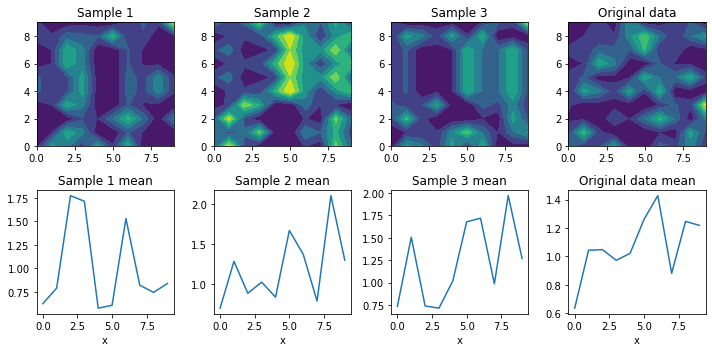

In [56]:
fig = plt.figure(figsize=(10,5))

for j in range(0,res.shape[0]-1):
    xmean = mean(res[j],axis=0)
    ax = fig.add_subplot(2,res.shape[0],j+1)
    ax.contourf(res[j])
    ax.set_title('Sample %s'%(j+1))
    ax = fig.add_subplot(2,res.shape[0],j+res.shape[0]+1)
    ax.plot(xmean)
    ax.set_title('Sample %s mean'%(j+1))
    ax.set_xlabel('x')
ax = fig.add_subplot(2,res.shape[0],4)
ax.contourf(res[-1])
ax.set_title('Original data')
ax = fig.add_subplot(2,res.shape[0],2*res.shape[0])
ax.plot(mean(data,axis=0))
ax.set_title('Original data mean')
ax.set_xlabel('x')
plt.tight_layout()

In [109]:
def generate_data(distrib,*args):
    return distrib(*args)
def bootstrap(values,args_distrib,B,stats,axis,t):
    """Boostrap method:
    Input:
    values : data or None if random generation of data following a specific distribution wanted
    args_distrib : args for chosen distribution
    B : number of resampling
    stats : estimator (function to define)
    axis : axis along which the stat function will be applied
    t : parameter defining the confidence interval
    Out:
    var : variance computed using bootstrap method
    low : lower bound of confidence interval
    high : high bound of confidence interval
    """
    if values.all==None:
        values = generate_data(distrib,*args_distrib)
    x_samples = resampling(values,B)
    n = stats(x_samples[-1,:,:],axis=axis).size
    means = mean(x_samples,axis+1)
    low = []
    high = []
    val = []
    p = ((1-t)/2) * 100
    p_ = ((1+t)/2) * 100
    for j in range(x_samples.shape[1]):
        _m = means[:,j]
        low.append(max(0.,np.percentile(_m, p)))
        high.append(np.percentile(_m, p_))
        val.append(_m[-1])
    return val,low,high #x_samples, 1/B*var, 1/B*tst#1/B*tst

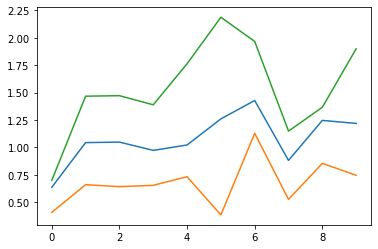

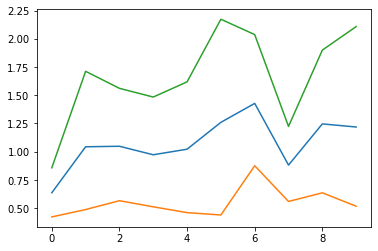

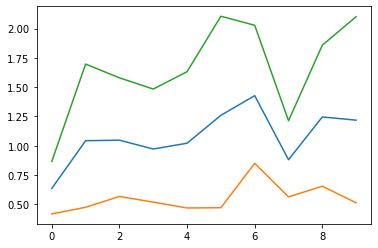

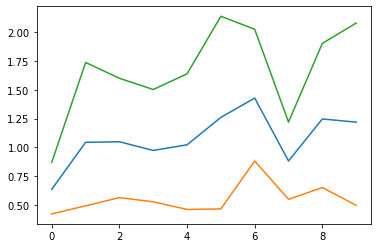

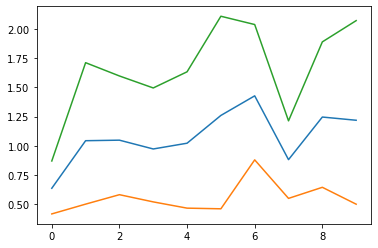

In [119]:
for j in range(10,10000,2000):
    val,low,upp = bootstrap(data,[],j,mean,0,0.95)
    plt.figure()
    plt.plot(val)
    plt.plot(low)
    plt.plot(upp)